Course *** Statistics of Stochastic procces *** 
by 
* Alexey Artemov; Alexey.Artemov@skoltech.ru, 
* Evgenii Egorov; Evgenii.Egorov@skoltech.ru 

In [1]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline

# Wiener process sampling path

In [2]:
def wiener_path_sample(X0, T, dt, sigma):
    key_points = int(T / dt)
    sample = norm.rvs(size=X0.shape[0] * key_points, loc=0., scale=np.sqrt(dt)*sigma).reshape(X0.shape[0], key_points) 
    np.cumsum(sample, axis=1, out=sample)
    return np.append(X0[:,None], sample, axis=1)

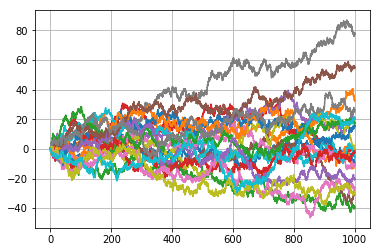

In [3]:
X0 = np.zeros(20)
T = 1000
dt = 0.1
sigma = 1.

samples_wiener = wiener_path_sample(X0, T, dt, sigma)
t = np.linspace(0.0, T, int(T / dt) + 1)
for path in samples_wiener:
    plt.plot(t, path);
plt.grid(True);

# 2D Brownian Motion process sampling path

Brownian motion in two dimensions is just stacked two one-dimensional Brownian motion.

In [4]:
X0 = np.zeros(2)
T = 50
dt = 0.1
sigma = 1.

samples_wiener = wiener_path_sample(X0, T, dt, sigma)

In [5]:
def plot_2d_brownian(samples):
    plt.plot(samples[0,:], samples[1,:]);
    plt.plot(samples[0,0], samples[1,0], 'go');
    plt.plot(samples[0,-1], samples[1,-1], 'ro');
    plt.grid(True)

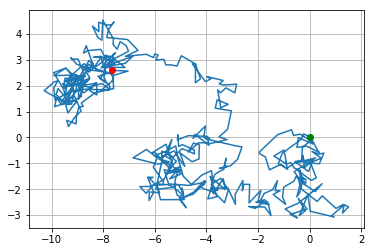

In [6]:
plot_2d_brownian(samples_wiener)

Now it is easy to see, why it is related to diffusion and heat equation

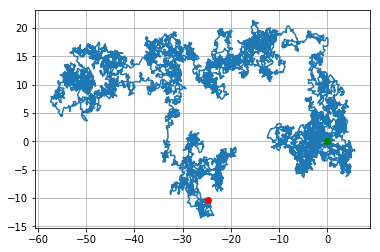

In [7]:
samples_wiener_diffusion = wiener_path_sample(X0, 1000, dt, sigma)
plot_2d_brownian(samples_wiener_diffusion)